In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import sem

In [2]:
#read in study data
studydata_df = pd.read_csv('Resources/Study_results.csv')
studydata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
#read in mouse data
mousedata_df = pd.read_csv('Resources/Mouse_metadata.csv')
mousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
# #search for duplicates

duplicateDFRow = studydata_df[studydata_df.duplicated()]
print(duplicateDFRow)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
137     g989          0                45.0                 0


In [5]:
#drop Mouse ID g989
restudydata_df=studydata_df[(studydata_df["Mouse ID"]!="g989")]
restudydata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
remousedata_df=mousedata_df[(mousedata_df["Mouse ID"]!="g989")]
remousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [7]:
#drop duplicates
cleanstudydata_df= restudydata_df.reset_index().drop_duplicates(subset=['Mouse ID'], keep ='last').set_index('index')
cleanstudydata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
index,,,,
1,f932,0,45.000000,0
20,x336,0,45.000000,0
53,h428,0,45.000000,0
55,v199,0,45.000000,0
109,o848,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1


In [8]:
#combining the data files
alldata_df = pd.merge(cleanstudydata_df, remousedata_df, on="Mouse ID")
alldata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# mean_tumorsize = np.mean('Drug Regimen', 'Tumor Volume (mm3)')
# print(f"The mean is {mean_tumorsize}")

# median_tumorsize = np.median('Tumor Volume (mm3)', 'Drug Regimen')
# print(f"The median  is {mean_tumorsize}")
# var_tumorsize = np.var('Tumor Volume (mm3)', ddof = 0)
# print(f"The variance using the NumPy module is {var_numpy}")

# std_tumorsize = np.std('Tumor Volume (mm3)',ddof = 0)
# print(f"The standard deviation using the NumPy module is {sd_numpy}")



In [10]:
#summary Stat Table
druggroup_df = alldata_df.groupby(['Drug Regimen'])
tumorvol_summary_df = pd.DataFrame({
    "Mean": druggroup_df["Tumor Volume (mm3)"].mean(),
    "Median": druggroup_df["Tumor Volume (mm3)"].median(),
    "Variance": druggroup_df["Tumor Volume (mm3)"].var(),
    "STD": druggroup_df["Tumor Volume (mm3)"].std(),
    "SEM": druggroup_df["Tumor Volume (mm3)"].sem(),
})
tumorvol_summary_df


Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.493884
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64

Drug Regimen
Capomulin    38.125164
Ceftamin     59.851956
Infubinol    60.165180
Ketapril     64.487812
Naftisol     63.283288
Placebo      62.030594
Propriva     55.591622
Ramicane     36.561652
Stelasyn     62.192350
Zoniferol    61.840058
Name: Tumor Volume (mm3), dtype: float64

Drug Regimen
Capomulin     5.715188
Ceftamin      8.365568
Infubinol     8.602957
Ketapril      9.945920
Naftisol     10.297083
Placebo       8.874672
Propriva      8.415626
Ramicane      5.671539
Stelasyn      9.504293
Zoniferol     8.767099
Name: Tumor Volume (mm3), dtype: float64

Drug Regimen
Capomulin     32.663378
Ceftamin      69.982735
Infubinol     74.010875
Ketapril      98.921330
Naftisol     106.029927
Placebo       78.759797
Propriva      70.822755
Ramicane      32.166354
Stelasyn      90.331586
Zoniferol     76.862027
Name: Tumor Volume (mm3), dtype: float64

Drug Regimen
Capomulin    1.143038
Ceftamin     1.673114
Infubinol    1.720591
Ketapril     1.989184
Naftisol     2.059417
Placebo      1.774934
Propriva     1.717832
Ramicane     1.134308
Stelasyn     1.940056
Zoniferol    1.753420
Name: Tumor Volume (mm3), dtype: float64

array(['Ketapril', 'Naftisol', 'Stelasyn', 'Zoniferol', 'Placebo',
       'Ceftamin', 'Propriva', 'Infubinol', 'Ramicane', 'Capomulin'],
      dtype=object)

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [18]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` 
#and Matplotlib's `pyplot` that shows the number of total mice for each
#treatment regimen throughout the course of the study.
micecount_drug_df= alldata_df[["Drug Regimen", "Mouse ID"]]
micecount = micecount_drug_df["Drug Regimen"].value_counts()
micecount

Naftisol     25
Ceftamin     25
Capomulin    25
Ketapril     25
Infubinol    25
Zoniferol    25
Ramicane     25
Placebo      25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice')

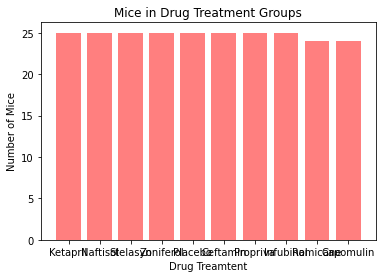

In [19]:
#matplot
# numbermice_treatment = alldata_df.plot(kind="bar", title="Total Mice for each treatment")
# numbermice_treatment.set_xlabel("Drug Treatment")
# numbermice_treatment.set_ylabel("Number of Mice")
plt.bar(drugs, micecount, color='r', alpha=0.5, align="center")
tick_locations = [value for value in drugs]
plt.xticks(tick_locations, drugs)
plt.title("Mice in Drug Treatment Groups")
plt.xlabel("Drug Treamtent")
plt.ylabel("Number of Mice")


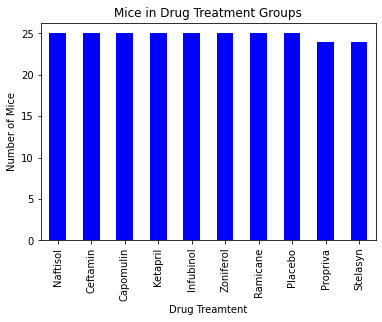

In [20]:
numbermice_treatment = micecount.plot(kind="bar", title="Total Mice for each treatment", color = "blue" )
plt.title("Mice in Drug Treatment Groups")
plt.xlabel("Drug Treamtent")
plt.ylabel("Number of Mice")
numbermice_treatment


Text(0.5, 1.0, 'Male vs Female in Study')

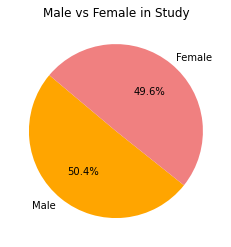

In [21]:
#PIE PLOT- Matplot
micesex= alldata_df["Sex"].value_counts()


labels= ["Male", "Female"]
colors= ["orange", "lightcoral"]
plt.pie(micesex, labels= labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Male vs Female in Study")


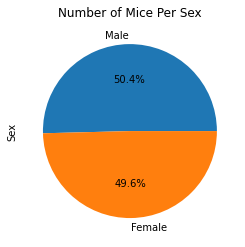

In [22]:
micesex.plot(kind="pie", autopct="%1.1f%%", title= "Number of Mice Per Sex" )